# Iris Species

In [1]:
import zipfile
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
# Unzip the file
zip_file_path = 'Iris Species.zip'
extracted_folder = 'Iris_data'

# Unzip the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# Load the dataset into a DataFrame
csv_file_name = os.path.join(extracted_folder, 'Iris.csv')
df = pd.read_csv(csv_file_name)

In [3]:
# Data Exploration

print("First few rows of the dataset:")
print(df.head())
print("\nBasic statistics:")
print(df.describe())
print("\nMissing values:")
print(df.isnull().sum())
print("\nData types and non-null counts:")
print(df.info())

First few rows of the dataset:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Basic statistics:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000

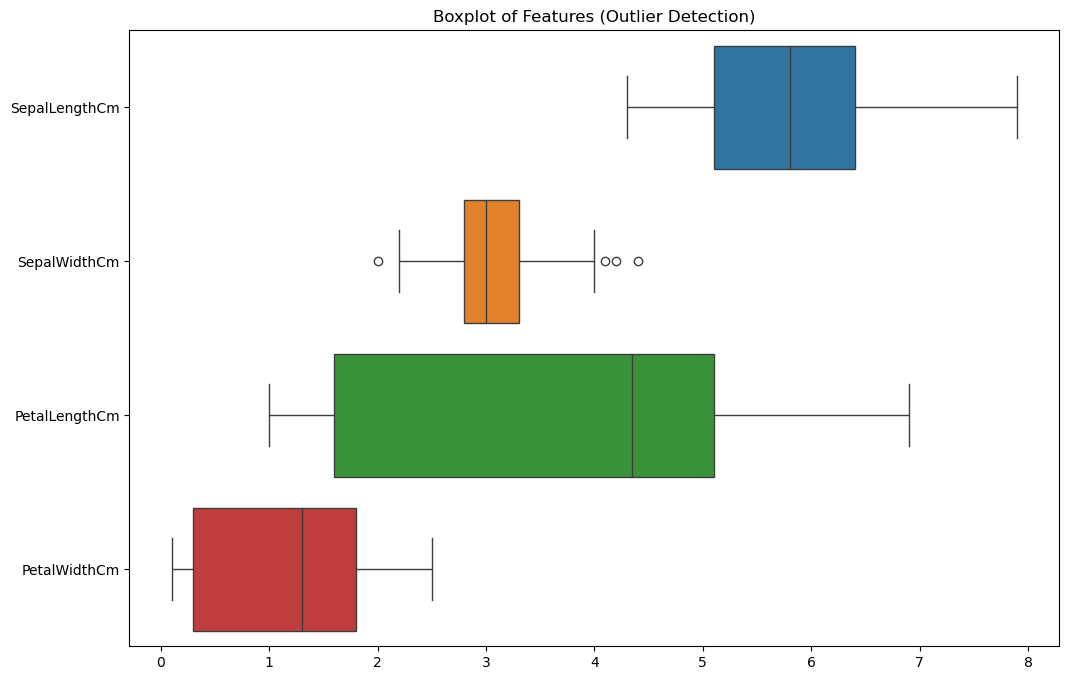


Potential outliers in SepalLengthCm:
Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []

Potential outliers in SepalWidthCm:
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
15  16            5.7           4.4            1.5           0.4   
32  33            5.2           4.1            1.5           0.1   
33  34            5.5           4.2            1.4           0.2   
60  61            5.0           2.0            3.5           1.0   

            Species  
15      Iris-setosa  
32      Iris-setosa  
33      Iris-setosa  
60  Iris-versicolor  

Potential outliers in PetalLengthCm:
Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []

Potential outliers in PetalWidthCm:
Empty DataFrame
Columns: [Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species]
Index: []


In [4]:
# Outlier Detection
# Plot boxplots for each numerical feature
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']], orient='h')
plt.title("Boxplot of Features (Outlier Detection)")
plt.show()

# Identify potential outliers using the IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

numerical_features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for feature in numerical_features:
    outliers = detect_outliers(df, feature)
    print(f"\nPotential outliers in {feature}:")
    print(outliers)

In [5]:
# Data Cleaning (Removing Outliers)
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

# Verify dataset after removing outliers
print("\nDataset after removing outliers:")
print(df.describe())


Dataset after removing outliers:
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  146.000000     146.000000    146.000000     146.000000    146.000000
mean    76.582192       5.856849      3.036986       3.807534      1.219863
std     43.453305       0.834093      0.395145       1.757117      0.760365
min      1.000000       4.300000      2.200000       1.000000      0.100000
25%     40.250000       5.100000      2.800000       1.600000      0.300000
50%     77.500000       5.800000      3.000000       4.400000      1.300000
75%    113.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.000000       6.900000      2.500000


In [6]:
# Standardize Numerical Features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print("\nDataset after standardizing numerical features:")
print(df.head())

# Step 5: Encode Species Labels
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

print("\nSpecies encoding mapping:")
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))


Dataset after standardizing numerical features:
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1      -0.910515      1.175789      -1.374878     -1.345899  Iris-setosa
1   2      -1.151122     -0.093924      -1.374878     -1.345899  Iris-setosa
2   3      -1.391729      0.413961      -1.431986     -1.345899  Iris-setosa
3   4      -1.512032      0.160019      -1.317771     -1.345899  Iris-setosa
4   5      -1.030819      1.429732      -1.374878     -1.345899  Iris-setosa

Species encoding mapping:
{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


In [7]:
# Encode Species Labels
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

print("\nSpecies encoding mapping:")
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))


Species encoding mapping:
{0: 0, 1: 1, 2: 2}


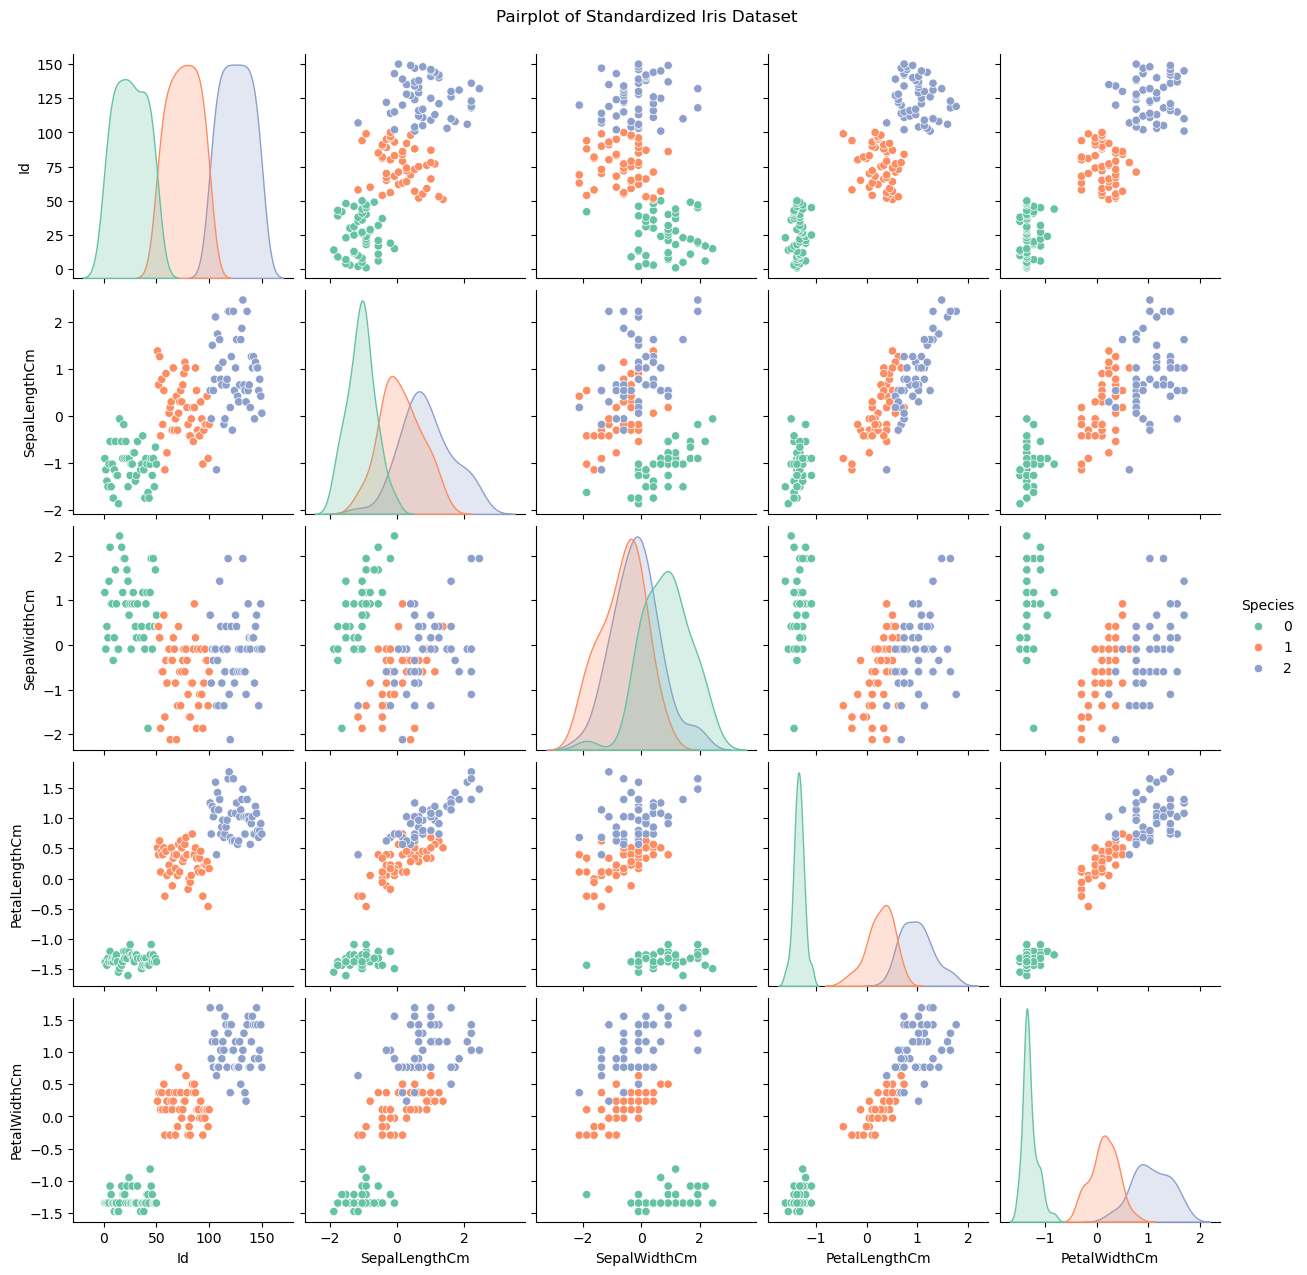

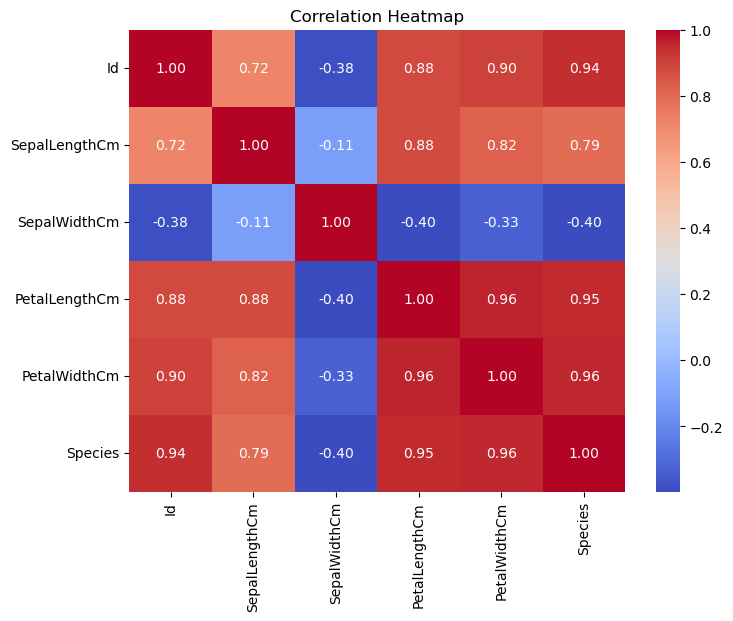

C:\Users\milto\AppData\Local\Temp\ipykernel_25508\1563737982.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=species_count.index, y=species_count.values, palette="muted")


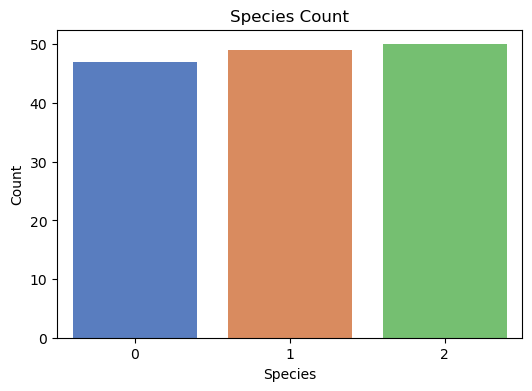

In [8]:
# Data Visualization

# Visualize Standardized Data
sns.pairplot(df, hue='Species', palette='Set2', diag_kind='kde')
plt.suptitle("Pairplot of Standardized Iris Dataset", y=1.02)
plt.show()

# Additional Insights
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Species count
species_count = df['Species'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=species_count.index, y=species_count.values, palette="muted")
plt.title("Species Count")
plt.xlabel("Species")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1, 2], labels=encoder.classes_)
plt.show()

In [ ]:
# Next Steps

# Once we have cleaned the data and understood the relationships between features
# we can proceed with building machine learning models (e.g Logistic, KNN, or Random Forest for classification) 
# to predict the species of the iris flowers.